# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [8]:
df['is_weekend'] = np.where((df['flight_day'] == 6) | (df['flight_day'] == 7), 1, 0)
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0


In [9]:
# Let's see how many passenger that have a flight in the weekend and weekday
num_passengers = df.groupby('is_weekend')['num_passengers'].count().reset_index()
num_passengers

,is_weekend,num_passengers
0,0,37634
1,1,12366


In [10]:
# Let's look at the average number of passengers per day
dayperday = df.groupby('flight_day')['num_passengers'].mean().reset_index()
dayperday

,flight_day,num_passengers
0,1,1.596273
1,2,1.571093
2,3,1.579098
3,4,1.575835
4,5,1.557166
5,6,1.615107
6,7,1.654257


In [11]:
# total number of passengers per day
totalperday = df.groupby('flight_day')['num_passengers'].count().reset_index()
totalperday

,flight_day,num_passengers
0,1,8102
1,2,7673
2,3,7674
3,4,7424
4,5,6761
5,6,5812
6,7,6554


From the table above, we can see that weekends have fewer flights than weekdays, so we need to consider adding flight schedules on weekends. but to be effective we need to see what routes have schedules on weekends with the most passengers.

In [12]:
route = df[df['is_weekend'] == 1].groupby('route').agg({'num_passengers' : 'sum'}).reset_index().sort_values(by='num_passengers', ascending=False)
route[:5]

,route,num_passengers
4,AKLKUL,1284
243,DMKKIX,462
606,PENTPE,396
375,ICNSIN,311
538,MELSGN,306


From the table above we can see the top 5 routes that have the most passengers, so my recommendation is that we increase the number of flights to these five routes on weekends.

In [13]:
df['route'].value_counts()

route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: count, Length: 799, dtype: int64

As the route variable has high Cardinality, we can drop this variable

In [14]:
df.drop(['route'],axis=1, inplace=True)

In [15]:
df.booking_origin.value_counts()

booking_origin
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64

pip install pycountry_convert

In [16]:
import pycountry_convert as pc

continent = []
index = []

df['booking_origin'] =  df['booking_origin'].replace('Myanmar (Burma)', 'Myanmar')

for i in range(len(df)):
    country = df['booking_origin'][i]
    try :
        country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
        continent_name = pc.country_alpha2_to_continent_code(country_code)
        continent.append(continent_name)
    except:
        continent.append('Others')

df['booking_continent'] = continent

In [17]:
df['booking_continent'].value_counts().sum()

50000

In [18]:
# Lets drop booking_origin as the same information is present on booking_continent
df.drop(["booking_origin"], axis = 1, inplace=True)

Let's see outlier on numeric column

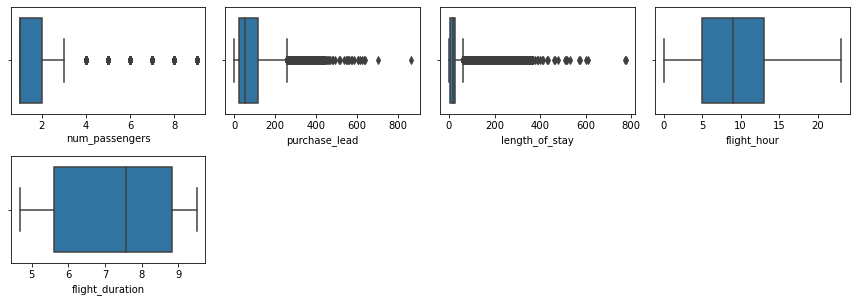

In [19]:
num = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
plt.figure(figsize=(12,8))

for i, column in enumerate (df[num].columns, 1):
    plt.subplot(4,4,i)
    sns.boxplot(data=df[num], x=df[column])
    plt.tight_layout()

As we can see, on purchase lead and length of stay have a lot of outlier values, so we will delete outlier wtih zscore so that not many columns are wasted

In [20]:
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

print(f'Total rows before delete outlier : {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in num:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    df = df[filtered_entries]

print(f'Total rows after delete outlier : {len(df)}')


Total rows before delete outlier : 50000
Total rows after delete outlier : 47115


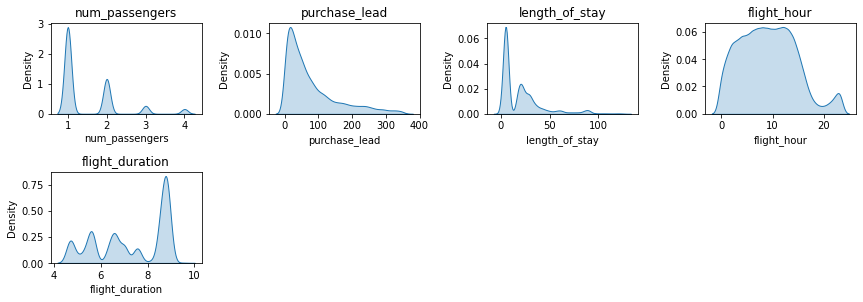

In [21]:
#plt.figure(figsize=(12,8))

#for i, column in enumerate (df[num].columns, 1):
#    plt.subplot(4,4,i)
#    sns.kdeplot(data=df[num], x=df[column])
#    plt.tight_layout()
    
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df[num] is your DataFrame containing numerical columns

# Get the list of numerical column names
numerical_columns = df[num].columns

# Define the number of rows and columns for subplots
num_rows = 4
num_cols = 4

# Create a new figure
plt.figure(figsize=(12, 8))

# Loop through the numerical columns and create KDE plots
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.kdeplot(data=df[num][column], shade=True)  # Create KDE plots for each column
    plt.title(column)  # Set the column name as the title
    plt.tight_layout()

plt.show()



In [22]:
from sklearn.preprocessing import Normalizer

num_max = df[num].max()
num_min = df[num].min()

num_features = (df[num] - num_min) / (num_max - num_min)
num_features.head()

df[num] = num_features

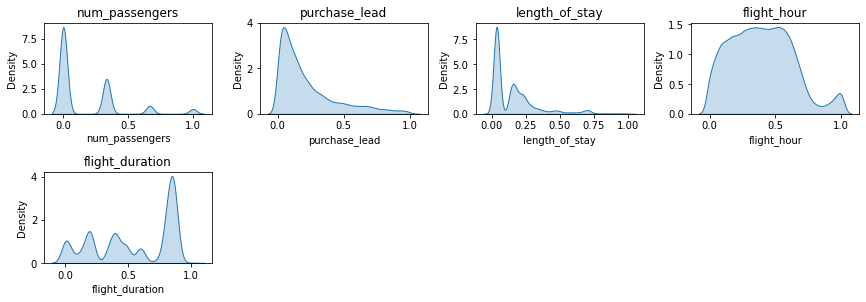

In [23]:
# Create a new figure
plt.figure(figsize=(12, 8))

# Loop through the numerical columns and create KDE plots
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.kdeplot(data=df[num][column], shade=True)  # Create KDE plots for each column
    plt.title(column)  # Set the column name as the title
    plt.tight_layout()

plt.show()

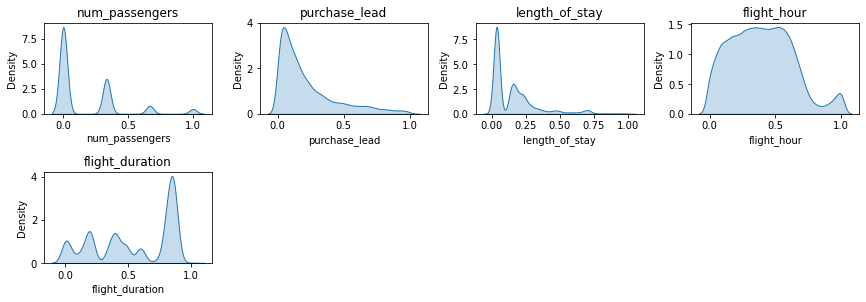

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df[num] is your DataFrame containing numerical columns

# Get the list of numerical column names
numerical_columns = df[num].columns

# Define the number of rows and columns for subplots
num_rows = 4
num_cols = 4

# Create a new figure
plt.figure(figsize=(12, 8))

# Loop through the numerical columns and create KDE plots
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.kdeplot(data=df[num][column], shade=True)  # Create KDE plots for each column
    plt.title(column)  # Set the column name as the title
    plt.tight_layout()

plt.show()


In [22]:
from sklearn.preprocessing import Normalizer

num_max = df[num].max()
num_min = df[num].min()

num_features = (df[num] - num_min) / (num_max - num_min)
num_features.head()

df[num] = num_features

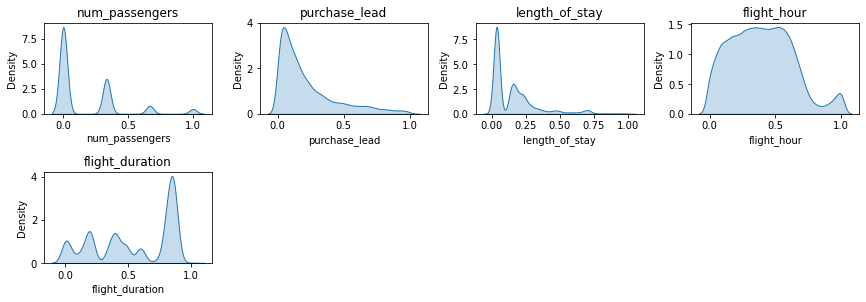

In [23]:
# Create a new figure
plt.figure(figsize=(12, 8))

# Loop through the numerical columns and create KDE plots
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.kdeplot(data=df[num][column], shade=True)  # Create KDE plots for each column
    plt.title(column)  # Set the column name as the title
    plt.tight_layout()

plt.show()

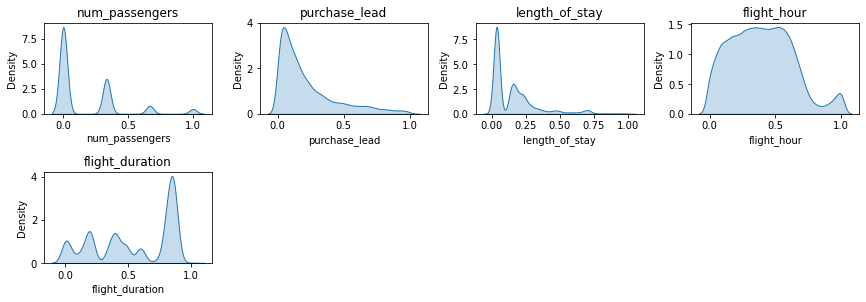

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df[num] is your DataFrame containing numerical columns

# Get the list of numerical column names
numerical_columns = df[num].columns

# Define the number of rows and columns for subplots
num_rows = 4
num_cols = 4

# Create a new figure
plt.figure(figsize=(12, 8))

# Loop through the numerical columns and create KDE plots
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.kdeplot(data=df[num][column], shade=True)  # Create KDE plots for each column
    plt.title(column)  # Set the column name as the title
    plt.tight_layout()

plt.show()


Now our numerical data have a better distribution than before feature transformation.

## Feature Encoding

In [25]:
from sklearn import preprocessing

label_encode = ['sales_channel']
one_hot = ['booking_continent']

mapping_trip_type = {
    'RoundTrip'  : 0,
    'OneWay'     : 1,
    'CircleTrip' : 2
}

df['trip_type'] = df['trip_type'].map(mapping_trip_type)

df['sales_channel'] = preprocessing.LabelEncoder().fit_transform(df['sales_channel'])

onehots = pd.get_dummies(df['booking_continent'], prefix='booking_continent')
df = df.join(onehots)

df.drop('booking_continent', axis=1, inplace=True)

In [26]:
df.head(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend,booking_continent_AF,booking_continent_AS,booking_continent_EU,booking_continent_NA,booking_continent_OC,booking_continent_Others,booking_continent_SA
0,0.333333,0,0,0.742210,0.150794,0.304348,6,1,0,0,0.175983,0,1,False,False,False,False,True,False,False
1,0.000000,0,0,0.317280,0.158730,0.130435,6,0,0,0,0.175983,0,1,False,False,False,False,True,False,False
2,0.333333,0,0,0.688385,0.174603,0.739130,3,1,1,0,0.175983,0,0,False,True,False,False,False,False,False
3,0.000000,0,0,0.271955,0.246032,0.173913,6,0,0,1,0.175983,0,1,False,False,False,False,True,False,False
4,0.333333,0,0,0.192635,0.174603,0.652174,3,1,0,1,0.175983,0,0,False,True,False,False,False,False,False


## Split Data

In [27]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend,booking_continent_AF,booking_continent_AS,booking_continent_EU,booking_continent_NA,booking_continent_OC,booking_continent_Others,booking_continent_SA
0,0.333333,0,0,0.742210,0.150794,0.304348,6,1,0,0,0.175983,0,1,False,False,False,False,True,False,False
1,0.000000,0,0,0.317280,0.158730,0.130435,6,0,0,0,0.175983,0,1,False,False,False,False,True,False,False
2,0.333333,0,0,0.688385,0.174603,0.739130,3,1,1,0,0.175983,0,0,False,True,False,False,False,False,False
3,0.000000,0,0,0.271955,0.246032,0.173913,6,0,0,1,0.175983,0,1,False,False,False,False,True,False,False
4,0.333333,0,0,0.192635,0.174603,0.652174,3,1,0,1,0.175983,0,0,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.333333,0,0,0.076487,0.047619,0.391304,6,1,0,1,0.196687,0,1,False,False,False,False,True,False,False
49996,0.000000,0,0,0.314448,0.047619,0.173913,7,0,0,0,0.196687,0,1,False,False,False,False,True,False,False
49997,0.000000,0,0,0.067989,0.047619,0.956522,6,0,0,1,0.196687,0,1,False,False,False,False,True,False,False
49998,0.000000,0,0,0.042493,0.047619,0.478261,1,1,0,1,0.196687,0,0,False,False,False,False,True,False,False


In [28]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=['booking_complete'], axis=1)
y = df['booking_complete']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
y_train.value_counts(normalize=True)

booking_complete
0    0.851136
1    0.148864
Name: proportion, dtype: float64

The Data is unbalance, so we need to balancing it with sampling techniques.

## Over sampling

pip install imblearn

In [30]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
x_over, y_over = sm.fit_resample(x_train, y_train.ravel())